In [1]:
import openqcs.tools as tools
import openqcs as o

import numpy as np
from numpy import sqrt, sin, cos
from scipy.linalg import logm, expm

import matplotlib.pyplot as plt

In [15]:
# Look up table for variety of parameter of diagonal pseudo Kraus operator
from numpy import pi

dKraus = [
    [
        np.matrix([[0, -1j], [1j, 0]]),
        np.matrix([[1, 0], [0, 1]])
    ],
    [
        np.matrix([[0,1],[1,0]]),
        np.matrix([[1,0],[0,-1]])
    ]
    

]

# Output message
class Message:
    def __init__(self):
        self.ier = False
        self.err = 0.0
        self.variant = 0 # variant of param for diagonal pseudo Kraus operator



def get_iterative_kraus_op(rho_in, rho_out, variant=0):
    # check if rho_in and rho_out are 2x2 density matrices
    if rho_in.shape[0]!=2 or rho_out.shape[0]!=2:
        raise ValueError("wrong dimension")
        
    if not tools.is_density_matrix(rho_in, pseudo=False) or not tools.is_density_matrix(rho_out, pseudo=False):
        raise ValueError("rho_in and rho_out have to be density matrices")
        
    # Define return values
    msg = Message()
    
        
    D0, U0 = tools.diagonalize(rho_in)
    D1, U1 = tools.diagonalize(rho_out)
    
    D0 = D0.real
    D1 = D1.real
    
    s0 = D0[0,0]
    s1 = D1[0,0]
    
    if 1-s0 <= s1 <= s0:
        msg.ier=True
        p = (s0 - s1)/(2*s0 - 1)
        
        S0 = dKraus[variant][0]
        S1 = dKraus[variant][1]
        
        E0 = U1@S0@U0.H
        E1 = U1@S1@U0.H
        
        rho_out_proj = p*E0@rho_in@E0.H + (1-p)*E1@rho_in@E1.H
        msg.err = np.linalg.norm(rho_out_proj - rho_out)
        
        return p, E0, E1, msg
    
    else:
        p = 0
        E0 = np.matrix(np.zeros((2,2)))
        E1 = np.matrix(np.zeros((2,2)))
        return p, E0, E1, msg

def test_vaiants(k):
    N = 10000
    n = 0
    data = []
    for i in range(N):

        rho_out = tools.random_density_matrix()
        rho_in = tools.random_density_matrix()
        p, E0, E1, msg = get_iterative_kraus_op(rho_in, rho_out, variant=k)
        if msg.ier:
            n += 1
            data.append(msg.err)


    return data


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


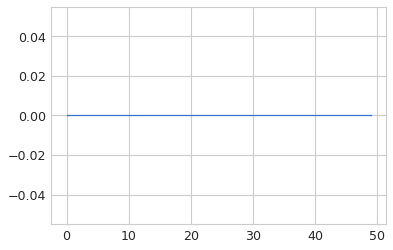

In [17]:
def H_(a,b):
    Id = np.matrix(np.eye(2), dtype=np.complex)
    X = np.matrix([[0,1],[1,0]], dtype=np.complex)
    Z = np.matrix([[1,0],[0,-1]], dtype=np.complex)
    
    return -a*np.kron(Z, Z) + b*(np.kron(Id,X) + np.kron(X,Id))

def T_(H, dt):
    return np.matrix(expm(-1j*H*dt))

def evo(a,b,t,dt=0.1):
    rho0 = np.matrix([[1,0],[0,0]], dtype=np.complex)
    rho_in = rho0
    n_t = int(t/dt)
    
    H = H_(a,b)
    T = T_(H,dt)
    
    probs = []
    
    
    for i in range(n_t):
        Ks = o.get_kraus_(T**(i+1))
        rho_out = o.channel_(rho0, Ks)
        
        p, E0, E1, msg = get_iterative_kraus_op(rho_out, rho_in)
        rho_in = rho_out
        probs.append(p)
        print(msg.ier)
        
    plt.figure()
    plt.plot(probs)
    plt.show()
        
    
    
evo(0.5, 0.5, 5.0)       

U0: 
 [[ 3.74939946e-33+6.123234e-17j -1.00000000e+00+0.000000e+00j]
 [ 1.00000000e+00-0.000000e+00j  3.74939946e-33-6.123234e-17j]]
U1: 
 [[-1.+1.2246468e-16j  0.+0.0000000e+00j]
 [-0.+0.0000000e+00j -1.-1.2246468e-16j]]

U0: 
 [[ 3.74939946e-33+6.123234e-17j -1.00000000e+00+0.000000e+00j]
 [ 1.00000000e+00-0.000000e+00j  3.74939946e-33-6.123234e-17j]]
U1: 
 [[ 1.0000000e+00-1.2246468e-16j -1.2246468e-16+0.0000000e+00j]
 [ 1.2246468e-16-0.0000000e+00j  1.0000000e+00+1.2246468e-16j]]

U0: 
 [[ 3.74939946e-33+6.123234e-17j -1.00000000e+00+0.000000e+00j]
 [ 1.00000000e+00-0.000000e+00j  3.74939946e-33-6.123234e-17j]]
U1: 
 [[ 1.0000000e+00-1.2246468e-16j  1.2246468e-16+0.0000000e+00j]
 [-1.2246468e-16+0.0000000e+00j  1.0000000e+00+1.2246468e-16j]]

U0: 
 [[ 3.74939946e-33+6.123234e-17j  1.00000000e+00+0.000000e+00j]
 [-1.00000000e+00+0.000000e+00j  3.74939946e-33-6.123234e-17j]]
U1: 
 [[-1.+1.2246468e-16j  0.+0.0000000e+00j]
 [-0.+0.0000000e+00j -1.-1.2246468e-16j]]

U0: 
 [[ 3.74939946e